# The Curse of Dimensionality - Lab

## Introduction

In this lab, you'll conduct some mathematical simulations to further investigate consequences of the curse of dimensionality.

## Objectives

You will be able to:

* Define a Euclidean Distance Function for n-dimensional space
* Plot a graph displaying how sparsity increases with n for n-dimensional spaces
* Demonstrate how training time increases exponentially as the number of features increases for supervised learning algorithms


## Sparseness in n-Dimensional Space

As discussed, points in n-dimensional space become increasingly sparse as the number of dimensions increases. To demonstrate this, you'll write a function to calculate the euclidean distance between two points. From there, you'll then generate random points in n-dimensional space, calculate their average distance from the origin, and plot the relationship between this average distance and n.

## Euclidean Distance

To start, write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Recall that the Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

In [2]:
def euclidean_distance(p1, p2):
    p1, p2 = np.array(p1), np.array(p2) #Ensure p1/p2 are NumPy Arrays
    return np.sqrt(np.sum(np.square(p2-p1)))

## Average Distance From the Origin

To examine the curse of dimensionality, you'll investigate the average distance to the center of n-dimensional space. As you'll see, this average distance increases as the number of dimensions increases. To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be the n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

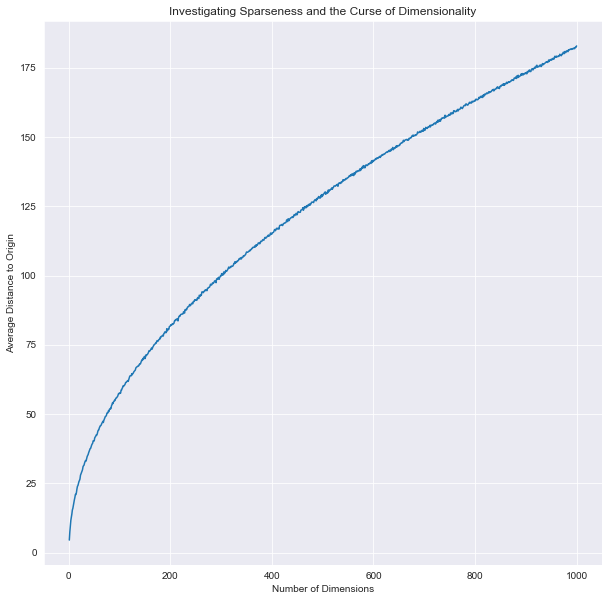

In [5]:
avg_distances = []
for n in range(1, 1001):
    avg_distances.append(np.mean([euclidean_distance(np.random.uniform(low=-10, high=10, size=n), 
                                                     [0 for i in range(n)]) for p in range(100)]))
plt.figure(figsize=(10,10))
plt.plot(range(1,1001), avg_distances)
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance to Origin')
plt.title('Investigating Sparseness and the Curse of Dimensionality');

## Convergence Time

As you've heard, another issue with increasing feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time. To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then sum these feature-coefficient products to get an output y. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

In [6]:
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression, Lasso

In [7]:
ols = LinearRegression()

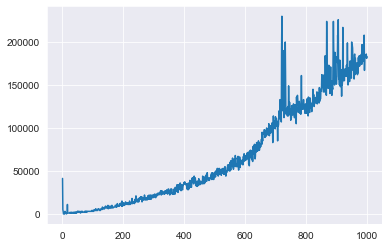

In [8]:
sample_size = 10**3
times = []
for n in range(1,1001):
    xi = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1,n+1))
    yi = np.sum(coeff*xi, axis=1) + np.random.normal(loc=0, scale=.1, size=sample_size)
    start = datetime.datetime.now()
    ols.fit(xi, yi)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1,1001), [t.microseconds for t in times]);

## Repeat the Same Experiment for a Lasso Penalized Regression Model

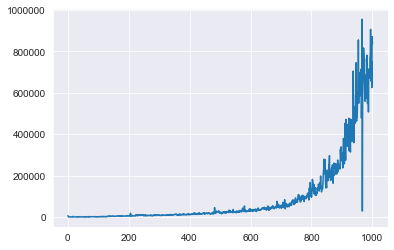

In [9]:
sample_size = 10**3
times = []
for n in range(1,1001):
    xi = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1,n+1))
    yi = np.sum(coeff*xi, axis=1) + np.random.normal(loc=0, scale=.1, size=sample_size)
    ols = Lasso()
    start = datetime.datetime.now()
    ols.fit(xi, yi)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1,1001), [t.microseconds for t in times]);

## Optional: Show Just How Slow it Can Go!

If you're up for putting your computer through the ringer and are very patient to allow the necessary computations, try increasing the maximum n from 1000 to 10,000 using Lasso regression. You should see an interesting pattern unveil. See if you can make any hypotheses as to why this might occur!

In [ ]:
#Your code here

## Summary

In this lab, you conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, the next section will start to explore Primary Component Analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.